In [2]:
import tensorflow as tf
tf.set_random_seed(42)

AttributeError: ignored

In [3]:
tf.__version__

'2.2.0'

In [4]:
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/ColabNotebooks/bank.csv'
df = pd.read_csv(path)

In [44]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [0]:
for column in df:
   if(df[column].nunique() == 10000):
    df.drop(column,inplace=True,axis=1)

In [60]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


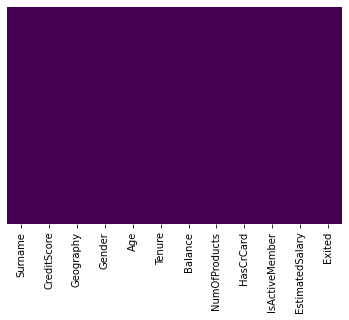

In [61]:
import seaborn as sns
#checking for null value
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
from sklearn.model_selection import train_test_split
y=df['Exited']
X=df.drop('Exited',axis=1)


In [0]:
from sklearn import preprocessing as pp
le = pp.LabelEncoder()
X['Surname'] = le.fit_transform(X['Surname'])
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [0]:
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [67]:
print(X_train.shape)

(8000, 11)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
model = Sequential()
model.add(BatchNormalization(input_shape = (11,)))
model.add(Dense(64,  activation = 'relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
from tensorflow.keras import optimizers
sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [75]:
import numpy as np
model.fit(X_train, np.array(y_train), batch_size = 700, epochs = 100, verbose = 1)

Epoch 1/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7628 - accuracy: 0.5161
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5648
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.6210
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6236 - accuracy: 0.7003
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7429
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5764 - accuracy: 0.7664
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5608 - accuracy: 0.7800
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7908
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5298 - accuracy: 0.7933
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5231 - accuracy: 0.7943
Epoch 11/

In [0]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In [82]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [76]:
results = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.7945


In [77]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.49829837679862976, 0.7944999933242798]


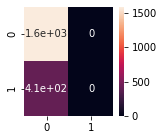

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sn
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
conf = confusion_matrix(y_test, Y_pred_cls)
df_cm = pd.DataFrame(conf, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (2,2))
sn.heatmap(df_cm, annot=True)